# **Import Packages**

In [ ]:
import pandas as pd
import numpy as np
import re
import json
import requests
import matplotlib.pyplot as plt
from collections import Counter

# **Load Data**

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_json(
    "/content/drive/MyDrive/ScholarAI/data/News_Category_Dataset_v3.json",
    lines=True,
    encoding="utf-8"
)
df.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


# **Overview of Data**

## **Dataset's size**

In [ ]:
print('Number of columes:', df.shape[0])
print('Number of rows:', df.shape[1])

Number of columes: 209527
Number of rows: 6


## **Dataset structure**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


# **Data Preprocessing**

## **Duplicate values**

In [ ]:
# Check duplicates
print(f"Duplicates found: {df.duplicated().sum()}")

Duplicates found: 13


In [ ]:
# Remove duplicates
df = df.drop_duplicates()
# Reset index after dropping
df = df.reset_index(drop=True)

df.duplicated().sum()

np.int64(0)

## **Missing values**

In [ ]:
print(f"\nMissing values:")
print(df.isnull().sum())


Missing values:
link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64


## **Text combination**

In [ ]:
# Combine headline and short_description for richer context
df['text'] = df['headline'] + ' ' + df['short_description']

# Clean text
df['text'] = df['text'].str.strip()
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)


In [ ]:
print(f"\nDataset shape after cleaning: {df.shape}")
df.sample(5)


Dataset shape after cleaning: (209527, 7)


,link,headline,category,short_description,authors,date,text
164813,https://www.huffingtonpost.com/entry/breast-ca...,The Sisterhood of St. Angelina,WELLNESS,Disclosure of something as personal as having ...,"Shelley Ross, Contributor\nEmmy Award-winning ...",2013-05-21,The Sisterhood of St. Angelina Disclosure of s...
28612,https://www.huffingtonpost.com/entry/i-hope-th...,I Hope This Week’s Graduates Acquired What I D...,COLLEGE,By Meg Scharf UCF Forum columnist What will th...,"University of Central Florida Forum, Contribut...",2017-08-02,I Hope This Week’s Graduates Acquired What I D...
142844,https://www.huffingtonpost.com/entry/designing...,Designing Woman Loree Rodkin,STYLE & BEAUTY,"""As an artist, I've always been attracted to t...","Yvonna Russell, Contributor\nWriter",2014-01-09,"Designing Woman Loree Rodkin ""As an artist, I'..."
143855,https://www.huffingtonpost.com/entry/tony-sche...,The Conscience of the King,CULTURE & ARTS,"Tony Scherman is a painter's painter, because ...","Bruce Helander, Contributor\nMember, Florida A...",2013-12-29,The Conscience of the King Tony Scherman is a ...
209387,https://www.huffingtonpost.com/entry/kelly-wea...,"Kelly Wearstler Designs New Hollywood Home, St...",HOME & LIVING,We've been wondering what designer and the que...,Dickson Wong,2012-01-30,"Kelly Wearstler Designs New Hollywood Home, St..."


##**Class Analysis**

In [ ]:
print(f"\nNumber of categories: {df['category'].nunique()}")
print(f"\nCategory distribution:")
category_counts = df['category'].value_counts()
print(category_counts)


Number of categories: 42

Category distribution:
category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATIN

**Merge some classes**

In [ ]:
df['category']=df['category'].replace(
{"HEALTHY LIVING": "WELLNESS",
"QUEER VOICES": "GROUPS VOICES",
"BUSINESS": "BUSINESS & FINANCES",
"PARENTS": "PARENTING",
"BLACK VOICES": "GROUPS VOICES",
"THE WORLDPOST": "WORLD NEWS",
"STYLE": "STYLE & BEAUTY",
"GREEN": "ENVIRONMENT",
"TASTE": "FOOD & DRINK",
"WORLDPOST": "WORLD NEWS",
"MONEY": "BUSINESS & FINANCES",
"ARTS": "ARTS & CULTURE",
"COLLEGE": "EDUCATION",
"LATINO VOICES": "GROUPS VOICES",
"CULTURE & ARTS": "ARTS & CULTURE",
"FIFTY": "MISCELLANEOUS",
"U.S. NEWS": "WORLD NEWS",
"GOOD NEWS": "MISCELLANEOUS"})

In [ ]:
print(f"\nNumber of categories after merging: {df['category'].nunique()}")
print(f"\nCategory distribution:")
category_counts = df['category'].value_counts()
print(category_counts)


Number of categories after merging: 27

Category distribution:
category
POLITICS               35601
WELLNESS               24636
ENTERTAINMENT          17362
PARENTING              12746
STYLE & BEAUTY         12065
GROUPS VOICES          12060
WORLD NEWS             10919
TRAVEL                  9900
FOOD & DRINK            8436
BUSINESS & FINANCES     7748
COMEDY                  5400
SPORTS                  5077
HOME & LIVING           4320
ENVIRONMENT             4065
ARTS & CULTURE          3922
WEDDINGS                3653
WOMEN                   3571
CRIME                   3562
IMPACT                  3484
DIVORCE                 3426
MEDIA                   2944
MISCELLANEOUS           2799
WEIRD NEWS              2777
RELIGION                2577
SCIENCE                 2206
EDUCATION               2158
TECH                    2100
Name: count, dtype: int64


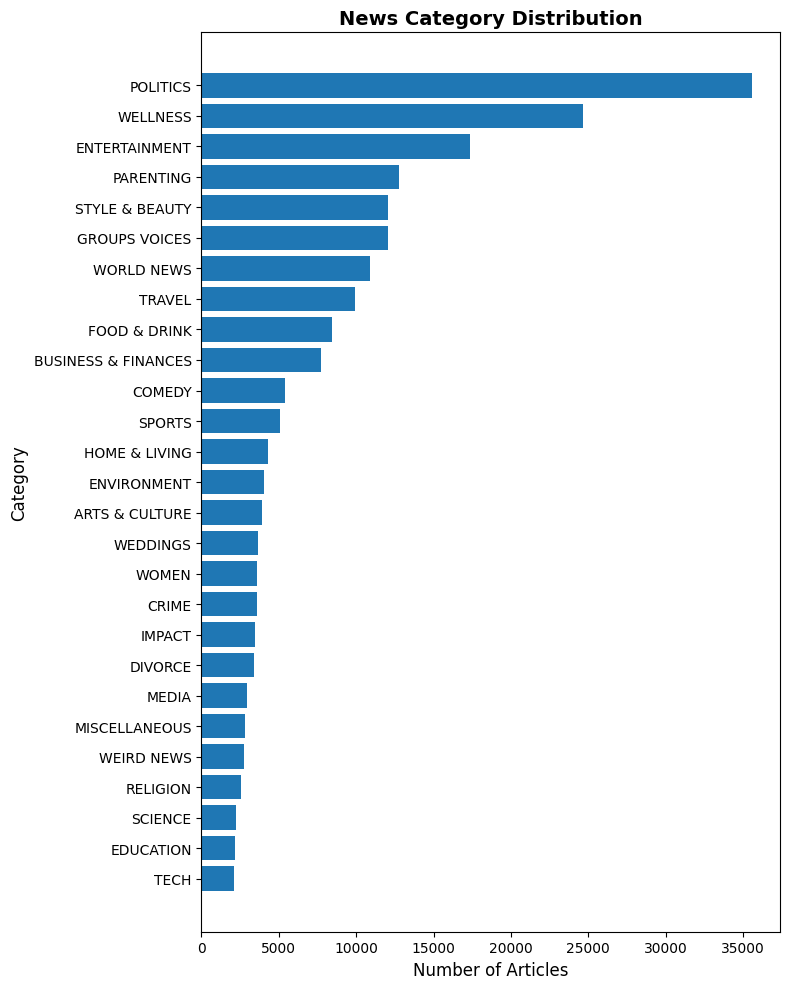

In [ ]:
plt.figure(figsize=(8, 10))

plt.barh(range(len(category_counts)), category_counts.values)
plt.ylabel('Category', fontsize=12)
plt.xlabel('Number of Articles', fontsize=12)
plt.title('News Category Distribution', fontsize=14, fontweight='bold')
plt.yticks(range(len(category_counts)), category_counts.index)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
print(f"Most common: {category_counts.index[0]} ({category_counts.values[0]} articles)")
print(f"Least common: {category_counts.index[-1]} ({category_counts.values[-1]} articles)")
print(f"Imbalance ratio: {category_counts.values[0]/category_counts.values[-1]:.2f}:1")

Most common: POLITICS (35601 articles)
Least common: TECH (2100 articles)
Imbalance ratio: 16.95:1


In [ ]:
df["date"] = df["date"].astype(str)

# Save changed dataset
output_path = "/content/drive/MyDrive/ScholarAI/data/output_dataset.json"

df.to_json(
    output_path,
    orient="records",
    lines=True,
    force_ascii=False
)

print("Saved to:", output_path)

Saved to: /content/drive/MyDrive/ScholarAI/data/output_dataset.json


In [ ]:
# Keep only necessary columns for training
df = df[['text', 'category']]
df

,text,category
0,Over 4 Million Americans Roll Up Sleeves For O...,WORLD NEWS
1,"American Airlines Flyer Charged, Banned For Li...",WORLD NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,WORLD NEWS
...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS
209524,"Giants Over Patriots, Jets Over Colts Among Mo...",SPORTS
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS


## **Label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])

In [ ]:
df['label']

,label
0,26
1,26
2,2
3,14
4,26
...,...
209509,20
209510,18
209511,18
209512,18


# **Data splitting**

In [ ]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

In [ ]:
# 80% train, 20% temp
train_df, temp_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

# 10% val, 10% test
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df['label']
)


In [ ]:
# Convert pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df, preserve_index=False)
val_dataset = Dataset.from_pandas(val_df, preserve_index=False)
test_dataset = Dataset.from_pandas(test_df, preserve_index=False)

# Create a DatasetDict to organize the datasets conveniently
datasets = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'category', 'label'],
        num_rows: 167611
    })
    validation: Dataset({
        features: ['text', 'category', 'label'],
        num_rows: 20951
    })
    test: Dataset({
        features: ['text', 'category', 'label'],
        num_rows: 20952
    })
})

# **Save the final Dataset**

In [ ]:
save_path = "/content/drive/MyDrive/ScholarAI/data/dataset_splits"

# Save to disk
datasets.save_to_disk(save_path)

Saving the dataset (0/1 shards):   0%|          | 0/167611 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/20951 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/20952 [00:00<?, ? examples/s]